### MAP556, Ecole Polytechnique, 2022-23

# TP 3 - Réduction de variance par échantillonage d'importance (Corrigés)

### Exercice.  Echantillonnage d'importance.

On considère $Y$ de loi gaussienne centrée réduite. On souhaite évaluer l'espérance $\mathbb E \left[ g(Y) \right]$ à partir de simulations, dans la situation où $g(y)=(y-2)^+$.


####  Question 1
Vérifier par intégration numérique (quadrature), puis par simulation que $\mathbb{E}\bigl[g(Y)\bigl]= m \simeq 8.5 \times 10^{-3}$ et $\mbox{Var}(g(Y)) = \sigma^2 \simeq 5.8 \times10^{-3}$. On pourra utiliser la fonction `scipy.integrate.quad`: vérifier dans la documentation de la fonction ses variables d'entrée et de sortie. Tracer les trajectoires des moyennes empiriques $I_n = \frac 1 n \sum_{i=1}^n (Y_i - 2)^+$ obtenues à partir de $n$ copies indépendantes $(Y_i)_{1 \le  i \le n}$ de $Y$, puis l'histogramme des erreurs.

Esp_gY = 0.00849  Var_gY = 0.0057 

mean = 0.0093  var = 0.0084
Intervalle de confiance 95% pour E[g(Y)] = [ 0.0060 , 0.0127 ] 

erreur relative = 0.3540


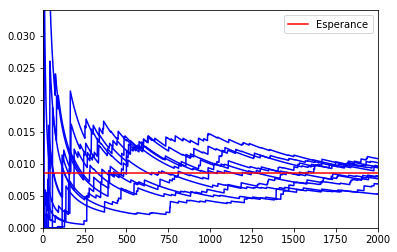

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

# densite Gaussienne standard
def densiteGaussienne (x) :
    return np.exp(-x**2./2.) / np.sqrt(2.*np.pi)

# fonction g
def g(x):
    return np.maximum(x-2.,0.)

############################################
# Calculer E[g(Y)] et Var[g(Y)] avec quadrature
# numeriques (par ex. scipy.integrate.quad )
def integrandEsperance(x):
    return g(x)*densiteGaussienne(x)
    
def integrandMomentOrdreDeux(x):
    return (g(x)**2.0)*densiteGaussienne(x)

Esp_gY = quad(integrandEsperance,-10.0,10.0)[0]
Var_gY = quad(integrandMomentOrdreDeux,-10.0,10.0)[0] - Esp_gY**2.0

print("Esp_gY = %1.5f  Var_gY = %1.4f \n" %(Esp_gY,Var_gY))

N = 2000 # Taille echantillon

integers1toN = np.arange(1,N+1) # Un vecteur contenant les entiers de 1 a N

############################################
# Completer avec N tirages de la loi gaussienne centree reduite
Y =  np.random.randn(N) 

# On calcule la fonction g(Y) sur l'echantillon
GY = g(Y)

############################################
# Stocker dans 'mean' l'estimation MC de E[g(Y)]
# dans 'var' la variance empirique 
# et dans 'demiLargeurIC' la demi-largeur de l'intervalle de confiance 
# asymptotique a 95% pour E[g(Y)]
mean = np.mean(GY)
var = np.var(GY)
demiLargeurIC = 1.96*np.sqrt(Var_gY/N)

print("mean = %1.4f  var = %1.4f" %(mean,var) )
print("Intervalle de confiance 95%% pour E[g(Y)] = [ %1.4f , %1.4f ] \n" %(mean - demiLargeurIC, mean + demiLargeurIC))
print("erreur relative = %1.4f" %(demiLargeurIC/mean))

################################################
# Trajectoires de la moyenne empirique
################################################
M = 10 # Nombre de repetitions 

################
# Evaluer les M tirages de l'estimateur empirique I_n pour n=1,...,N
Y = np.random.randn(M,N) 
GY = g(Y)
I_n = np.cumsum(GY, axis=1)/integers1toN

################
# Affichage des trajectoires
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(0, 4*Esp_gY)
ax.axhline(Esp_gY, color="r", label="Esperance")
ax.legend(loc="best")
plt.show()

####  Question 2: Echantillonnage d'importance 

**(a)** Montrer que si $Z$ est une variable aléatoire gaussienne réduite et centrée en $\theta$, on a

$$
\mathbb{E} [ g(Y) ]
=
\mathbb{E} \Bigl[ g(Z) \, e^{-\theta \, Z + \frac{\theta^2}2} \Bigr]
$$

Quel est l'intérêt d'une telle formule?

**(b)** Proposer un estimateur de $\mathbb{E}[g(Y)]$ basé sur la simulation de la loi gaussienne réduite et centrée en $2$.
On note $J_n$ cet estimateur. Vérifier par intégration numérique, puis par simulation que
 $\mbox{Var}\biggl(g(Z)e^{-\theta Z + \frac{\theta^2}2}\biggr) = \sigma_J^2 \simeq~9.7\times10^{-5}$.
 
Tracer les trajectoires de l'estimateur $J_n$, comparer avec la quantité recherchée. Quel est le gain en termes de nombre de simulations de cet estimateur,
pour la même précision asymptotique que la méthode de Monte Carlo naive?

Esp_g_theta = 0.00849  Var_g_theta = 0.000097 

Jmean = 0.0085  Jvar = 0.000098
Intervalle de confiance 95% pour E[g(Y)] = [ 0.008033 , 0.008900 ]
erreur relative = 0.0512


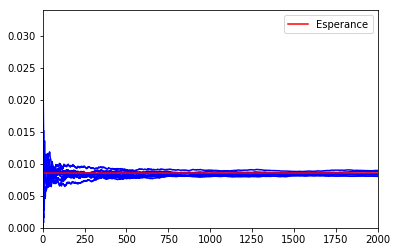

In [3]:
theta = 2.

def g_importance(z, theta=theta):
    return np.maximum(z-2.,0.) * np.exp(-theta*z + theta*theta/2.)

def integrandEsperance_importance(z, theta=theta):
    return densiteGaussienne(z-2.0) * g_importance(z,theta)

def integrandMomentOrdre2_importance(z, theta=theta):
    return densiteGaussienne(z-2.0)* g_importance(z,theta)**2

# Moyenne et variance theoriques de l'estimateur d'importance 
Esp_g_theta = quad(integrandEsperance_importance, -10., 10.)[0] 
Esp_2 = quad(integrandMomentOrdre2_importance, -10., 10.)[0]
Var_g_theta = Esp_2 - Esp_g_theta*Esp_g_theta
 
print("Esp_g_theta = %1.5f  Var_g_theta = %1.6f \n" %(Esp_g_theta, Var_g_theta))

N = 2000 # Taille echantillon
integers1toN = np.arange(1,N+1)

Z = np.random.randn(N) + theta # Loi gaussienne centrée en theta=2

GY = g_importance(Z)

# estimateur d'importante
mean = np.mean(GY)

# variance empirique et Intervalle de confiance
var = np.var(GY)
demiLargeurIC = 1.96 * np.sqrt(var / N)

print("Jmean = %1.4f  Jvar = %1.6f" %(mean, var))
print("Intervalle de confiance 95%% pour E[g(Y)] = [ %1.6f , %1.6f ]" %(mean - demiLargeurIC, mean + demiLargeurIC))
print("erreur relative = %1.4f" %(demiLargeurIC/mean))

################################################
# Trajectoires de l'estimateur empirique
################################################
M = 10

Z = np.random.randn(M,N) + theta # Loi gaussienne centrée en theta=2

GY = g_importance(Z)

J_n = np.cumsum(GY, axis=1)/ integers1toN

# Affichage des 10 trajectoires
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, J_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(0, 4*Esp_g_theta)
ax.axhline(Esp_g_theta, color="r", label="Esperance")
ax.legend(loc="best")
plt.show()

####  Question 3: 
Comparer graphiquement les histogrammes des erreurs des estimateurs $I_n$ et $J_n$, pour $n=1000$.

In [ ]:
M = 1000 # Nombre de tirages
N = 1000 # Taille echantillon

Y = np.random.randn(M,N)

GY = g(Y) # echantillon a partir de N(0,1)

GY_importance = g_importance(Y+2.) # echantillon a partir de N(2,1)

def erreurMC(N1):
    return (np.mean(GY[:,0:N1],axis=1) - Esp_gY) * np.sqrt(N1)

def erreurImportance(N1):
    return (np.mean(GY_importance[:,0:N1],axis=1) - Esp_gY) * np.sqrt(N1)

# Affichage histogramme de l'erreur pour l'estimateur MC
# et pour l'estimateur d'importance
plt.hist(erreurMC(N), density="True", bins=int(np.sqrt(M)), label="erreur MC")

plt.hist(erreurImportance(N), density="True", bins=int(np.sqrt(M)), label="erreur Imp")

plt.legend(loc="best")
plt.show()